In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df= pd.DataFrame()

# df = pd.read_csv('/content/drive/MyDrive/deep leaning 2nd course /texts_train.txt', sep="\t", encoding='UTF-8',header=0)
# df['grade'] = pd.read_csv('/content/drive/MyDrive/deep leaning 2nd course /scores_train.txt', sep="\t", encoding='UTF-8',header=0)

df = pd.read_csv('texts_train.txt', sep="\t", encoding='UTF-8',header=0)
df['grade'] = pd.read_csv('scores_train.txt', sep="\t", encoding='UTF-8',header=0)

df.columns = ['comment', 'grade']
print(df.head())

                                             comment  grade
0  думал, что будет лучше идея очень интересна - ...      7
1  с творчеством Головачева я познакомился посред...     10
2  то-то я и в большое неудовольствие прочитал "А...      5
3  как мне показалось местами сильно смахивает на...      6
4  от первой части книги просто оторваться не мог...      9


In [ ]:
import numpy as np
unique_grades = np.sort(df['grade'].unique())
print('all unique grades: ',unique_grades)
unique_grades  = [1,2,3,4,5,6,7,8,9,10]
print('new unique grades: ',unique_grades)

all unique grades:  [ 1  2  3  4  5  6  7  8  9 10]
new unique grades:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
df_new = pd.DataFrame()
comment = []
grade = []

for grades in unique_grades:
    counter = 0
    for i in range(len(df)):
    #for i in range(000/(len(unique_grades))):
        if (counter<300):
            if (grades == df['grade'][i]):
                comment.append(df['comment'][i])
                grade.append(df['grade'][i])
                counter = counter + 1 
df_new['comment'] = comment
#Заменим значения оценок на 1,2,3 
#Это облегчит подсчет ошибки 
#1 - негативный отзыв
#2 - нейтральный 
#3 - положительный
df_new['grade'] = grade
df_new['grade'] = df_new['grade'].replace(1, 0).replace(2, 0).replace(3, 0)
#df_new['grade'] = 
df_new['grade'] = df_new['grade'].replace(10, 1).replace(9, 1).replace(8, 1)

df_new['grade'] = df_new['grade'].replace(4, 2).replace(5, 2).replace(6, 2).replace(7, 2)

print('new unique grades: ',np.sort(df_new['grade'].unique()))
print(df_new.head())

new unique grades:  [0 1 2]
                                             comment  grade
0  Хотелось долго плеваться после того как я с тр...      0
1  ИМХО, в серии о Свароге Бушков исписался. Если...      0
2  Много был наслышан об этом авторе и вот взялся...      0
3  Да, тяжело читать безграмотную фэнтези. Хотя, ...      0
4  Попытка свести сюжет предыдущих книг в единое ...      0


In [ ]:
print(df_new.tail())

                                                comment  grade
2825  книга не похожа ни на одну из тех,что вы читал...      1
2826  к Есенину у меня любовь не просто как к поэту,...      1
2827  очень чувственно, с болью, настоящей мужской б...      1
2828  назовите мне писателя, хотя бы близко напомина...      1
2829  несмотря на то,что поэзия Пастернака не произв...      1


In [ ]:
print(df_new[1250:1260])

                                                comment  grade
1250  Вялые попытки Перумова склеить в одно скандина...      2
1251  Редкостная тягомотина. Нагромождение людских п...      2
1252  Читать не задумываясь, может быть, и можно. Но...      2
1253  Занудно, и не о чем. Главный герой супер маг и...      2
1254  Псевдофилосовская поделка. Для любителей найти...      2
1255  Да, в книге написаны правильные хорошие вещи.Н...      2
1256  Прочитала только эту книгу о ГП. Отношение оче...      2
1257  Говорящий дог (в прошлой жизни - английский ло...      2
1258  Знаменитые музыканты, случается, выпускают бес...      2
1259  Заслуживает внимания, местами очень интересно....      2


In [ ]:
df_new.to_csv('treeclasses_sorted_comments.csv', sep = '|') #save this dataset to csv

In [ ]:
array_of_mean_thensors = []
grade = []
comment = []
uncomtiled_rows = 0
for i in range(len(df_new)):
    try: 
        grade.append(df_new['grade'][i])
        comment.append(df_new['comment'][i])
    except:
        #in some cases, from my point of view, when comment is too large, the data has not processed, and it cause some errors
        uncomtiled_rows = uncomtiled_rows + 1
        #print('Too long or to short comment')

In [ ]:
print(comment[1250],' ',grade[1250])

Вялые попытки Перумова склеить в одно скандинавскую и древнегреческую мифологию позабавили. Подробные описания, как и чего наколдовал мятежный колдун, кого и насколько жестоко завоевал его ученик, довольно интересны, но слишком их много. Идея? Она у Перумова, по-моему, одна на все книги. Запали в душу: 1) момент появления у Хагена ученика (как он бережно помогал ему родиться); 2)образ Демогоргона - собрания страдающих душ.   2


In [ ]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def preproccessing(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in punctuation])
    text = text.split(' ')
    #print ('Number of reviews :', len(text))
    return text 

In [ ]:
tokenized_corpus = [preproccessing(i) for i in comment ]

In [ ]:
tokenized_corpus[:2]

[['хотелось',
  'долго',
  'плеваться',
  'после',
  'того',
  'как',
  'я',
  'с',
  'трудом',
  'осилил',
  'половину',
  'книги',
  'на',
  'этом',
  'моё',
  'увлечения',
  'творчеством',
  'никитина',
  'было',
  'закончено',
  'я',
  'даже',
  'не',
  'захотел',
  'читать',
  'уже',
  'купленную',
  'книгу',
  'изгой',
  'из',
  'любимого',
  'некогда',
  'цикла',
  'трое',
  'из',
  'леса'],
 ['имхо',
  'в',
  'серии',
  'о',
  'свароге',
  'бушков',
  'исписался',
  'если',
  'первые',
  'две',
  'книги',
  'еще',
  'читать',
  'интересно',
  'то',
  'остальное',
  'в',
  'общем',
  'сварога',
  'пора',
  'убивать']]

In [ ]:
totalVocabs = []
for sentence in tokenized_corpus:
    for token in sentence:
        totalVocabs.append(token)

print("total = ", len(totalVocabs))

total =  94851


In [ ]:
print("sentences = ", len(tokenized_corpus))

sentences =  2830


In [ ]:
print("grades = ", len(grade))

grades =  2830


In [ ]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

vocabulary_size = len(vocabulary)
print(vocabulary)

['хотелось', 'долго', 'плеваться', 'после', 'того', 'как', 'я', 'с', 'трудом', 'осилил', 'половину', 'книги', 'на', 'этом', 'моё', 'увлечения', 'творчеством', 'никитина', 'было', 'закончено', 'даже', 'не', 'захотел', 'читать', 'уже', 'купленную', 'книгу', 'изгой', 'из', 'любимого', 'некогда', 'цикла', 'трое', 'леса', 'имхо', 'в', 'серии', 'о', 'свароге', 'бушков', 'исписался', 'если', 'первые', 'две', 'еще', 'интересно', 'то', 'остальное', 'общем', 'сварога', 'пора', 'убивать', 'много', 'был', 'наслышан', 'об', 'авторе', 'и', 'вот', 'взялся', 'прочесть', 'сказать', 'что', 'книга', 'разочаровала', '', 'ничего', 'смысловые', 'ляпы', 'каждом', 'шагу', 'например', 'команда', 'огонь', 'при', 'стрельбе', 'луков', 'мире', 'где', 'нет', 'индивидуального', 'огнестрельного', 'оружия', 'тд', 'громоздкий', 'вычурный', 'язык', 'отсутствие', 'концовки', 'путешествие', 'неизвестно', 'куда', 'зачем', 'слабая', 'мотивация', 'поступков', 'героев', 'гораздо', 'ниже', 'среднего', 'теперь', 'начинаю', 'пон

In [ ]:
word2idx = {w: idx+1 for (idx, w) in enumerate(vocabulary)}

In [ ]:
idx2word = {idx+1: w for (idx, w) in enumerate(vocabulary)}


In [ ]:
len(vocabulary)

25465

In [ ]:
len(set(vocabulary))

25465

In [ ]:
word2idx

In [ ]:
idx2word

In [ ]:
comment_in_num = []
for sentence in tokenized_corpus:
    comment_in_num.append([word2idx[word] for word in sentence])

In [ ]:
print(comment_in_num[:1])

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 7, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 29, 34]]


In [ ]:
len(comment_in_num)

2830

In [ ]:
len(comment_in_num) == len(tokenized_corpus) == len(grade)

True

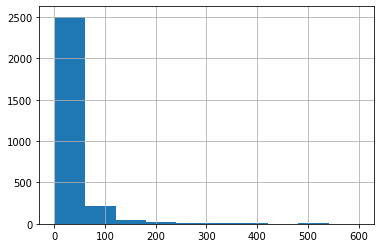

count    2830.000000
mean       33.516254
std        50.148168
min         1.000000
25%        11.000000
50%        21.000000
75%        37.000000
max       601.000000
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
comment_len = [len(x) for x in comment_in_num]
pd.Series(comment_len).hist()
plt.show()
pd.Series(comment_len).describe()

In [ ]:
def pad_features(reviews_int, seq_length):
    #Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [ ]:
features = pad_features(comment_in_num, 33)

In [ ]:
features

array([[    1,     2,     3, ...,    30,    31,    32],
       [    0,     0,     0, ...,    50,    51,    52],
       [   53,    54,    55, ...,    36,    78,    79],
       ...,
       [    0,     0,     0, ...,  2369, 22406,   394],
       [    0,     0,     0, ...,   153, 19572,  1403],
       [ 2143,    13, 22370, ...,    13,  4874, 17258]])

In [ ]:
print("features len = ", len(features))

features len =  2830


In [ ]:
print("grades len = ", len(grade))

grades len =  3000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(features),np.array(grade), test_size=0.2, random_state=42)

In [ ]:
len(X_train)

2264

In [ ]:
len(y_train)

2400

In [ ]:
import os

In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
# train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
# test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_data = TensorDataset(torch.cuda.FloatTensor(X_train), torch.cuda.LongTensor(y_train))
test_data = TensorDataset(torch.cuda.FloatTensor(X_test), torch.cuda.LongTensor(y_test))

# dataloaders
batch_size = 5
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([5, 33])
Sample input: 
 tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 8.2600e+02, 2.9000e+01, 8.0810e+03, 8.0820e+03,
         1.3000e+01, 8.0830e+03, 6.3000e+02, 1.4900e+02, 1.7340e+03, 4.8950e+03,
         3.7000e+01, 7.1540e+03, 8.0840e+03, 8.0850e+03, 3.2910e+03, 9.7000e+01,
         3.6000e+01, 8.0860e+03, 5.7860e+03],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.9000e+01, 1.0952e+04, 2.4000e+01, 2.2400e+02, 3.0300e+02,
         2.2000e+01, 2.1780e+03, 8.9770e+03, 3.8540e+03, 3.3110e+03, 1.0100e+02,
         6.4470e+03, 5.8700e+03, 1.3596e+04, 5.9000e+01, 1.4900e+02, 2.7380e+03,
         3.6000e+01, 8.5300e+02, 1.3597e+04],
        [0.0000e+00, 0.0000e+00, 0.0000e+0

<li>0. Tokenize : This is not a layer for LSTM network but a mandatory step of converting our words into tokens (integers)
<li>Embedding Layer: that converts our word tokens (integers) into embedding of specific size
<li>LSTM Layer: defined by hidden state dims and number of layers
<li>Fully Connected Layer: that maps output of LSTM layer to a desired output size
<li>Sigmoid Activation Layer: that turns all output values in a value between 0 and 1
<li>Output: Sigmoid output from the last timestep is considered as the final output of this network

In [ ]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()
        

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim


        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        
        self.dropout = nn.Dropout(0.2)
        
        self.linear = nn.Linear(hidden_dim, 3)
        
        # self.sig = nn.Sigmoid()
        # self.sig = nn.Softmax()

        
    def forward(self, x):
        x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        
        return self.linear(ht[-1])
        # return self.sig(self.linear(ht[-1]))

    
    # def forward(self, x, hidden):

    #     batch_size = x.size(0)

    #     # embeddings and lstm_out
    #     embeds = self.embeddings(x)
    #     lstm_out, hidden = self.lstm(embeds, hidden)
    
    #     # stack up lstm outputs
    #     lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
    #     # dropout and fully-connected layer
    #     out = self.dropout(lstm_out)
    #     out = self.linear(out)

    #     return out, hidden

    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
    
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocabulary)+1 # +1 for the 0 padding
output_size = 3
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)


SentimentLSTM(
  (embeddings): Embedding(22411, 400, padding_idx=0)
  (lstm): LSTM(400, 256, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear): Linear(in_features=256, out_features=3, bias=True)
)


In [ ]:
import tqdm 
# loss and optimization functions
lr=0.001

# criterion = nn.NLLLoss()
# criterion = nn.KLDivLoss()
criterion = nn.CrossEntropyLoss()
# criterion = nn.BCEWithLogitsLoss()
# criterion = nn.BCELoss()

optimizer = torch.optim.Adam(net.parameters(), lr=lr)
# optimizer = torch.optim.SGD(net.parameters(), lr=lr)
# training params


counter = 0
print_every = 10
clip=5 # gradient clipping

# move model to GPU, if available
train_on_gpu = True
if(train_on_gpu):
    net.cuda()

net.train()
losses = []
epochs = 3
# train for some number of epochs
for e in tqdm.tqdm (range(epochs)):

    # hidden = net.init_hidden(batch_size)

    loss_ = []
    # batch loop
    for inputs, labels in train_loader:
        net.train()
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()


        # hidden = tuple([each.data for each in hidden])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.cuda.LongTensor)
        # print("input before NN", inputs)

        # output = net(inputs, hidden)
        output = net(inputs)

        # inputs = inputs.type(torch.LongTensor)
        # output, hidden = net(inputs, hidden)
        # output = net(inputs)

        # output = torch.flatten(output)

        print("output = ",output)
        print("labels = ",labels.long())        

        loss = criterion(output.squeeze(), labels.long())
        # loss = criterion(output.squeeze(), labels.float())
        # loss = criterion(output, labels)

        

        loss.backward()
        
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        
        optimizer.step()

        loss_.append(loss.item())

    losses.append(np.mean(loss_))      

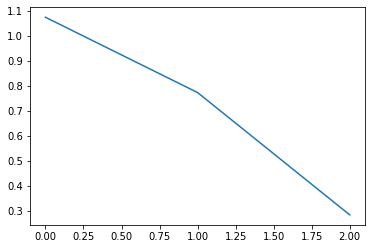

In [ ]:
plt.plot(range(len(losses)), losses, label='train')

In [ ]:
losses

[1.0737705801759598, 0.772769317063801, 0.28386594868670106]

In [ ]:
from sklearn.metrics import accuracy_score

def binary_accuracy(preds, y):
    #round predictions to the closest integer
    acc = accuracy_score(preds,y)
    return acc

In [ ]:
test_losses = [] # track loss
num_correct = 0

count = 0

# init hidden state
hidden = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    hidden = tuple([each.data for each in hidden])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    # inputs = inputs.type(torch.LongTensor)
    # output, hidden = net(inputs, hidden)
    output = net(inputs.long())
    
    # output = torch.flatten(output)

    # calculate loss
    loss = criterion(output.squeeze(), labels.long())
    # loss = criterion(output.squeeze(), labels.float())
    test_losses.append(loss.item())
    
    print("predict output = ",output)

    # convert output probabilities to predicted class (0 or 1)
    # pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # pred = torch.max(output, 1)[1]
    pred = torch.argmax(output,1)
    print("predict output.squeeze = ",pred)

    print("labels = ",labels)

    # compare predictions to true label
    # correct_tensor = pred.eq(labels.float().view_as(pred))
    num_correct += (pred == labels.float().view_as(pred)).sum()

    count += 1
    print("count = ", count)

    # correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

predict output =  tensor([[ 2.6393, -3.3907,  0.5285],
        [-0.5008, -1.4640,  1.6371],
        [-0.6883,  0.1056,  0.3706],
        [-0.6857, -2.8499,  3.5558],
        [ 0.5296, -1.8289,  0.8128]], device='cuda:0', grad_fn=<AddmmBackward>)
predict output.squeeze =  tensor([0, 2, 2, 2, 2], device='cuda:0')
labels =  tensor([0, 0, 0, 1, 0], device='cuda:0')
count =  1
predict output =  tensor([[ 4.6906e-01, -5.5268e-01, -1.5126e-03],
        [ 4.6503e-01, -1.1092e+00,  9.2652e-01],
        [ 3.9881e+00, -2.3369e+00, -1.2590e+00],
        [-1.4286e+00, -9.7900e-01,  2.2788e+00],
        [-1.0745e+00,  4.0293e-01,  4.3750e-01]], device='cuda:0',
       grad_fn=<AddmmBackward>)
predict output.squeeze =  tensor([0, 2, 0, 2, 2], device='cuda:0')
labels =  tensor([2, 1, 0, 0, 1], device='cuda:0')
count =  2
predict output =  tensor([[-2.4707,  2.4174,  0.3834],
        [ 1.3622, -0.9346, -0.2990],
        [-0.2054, -0.6505,  0.7540],
        [-1.5617,  0.0515,  1.3404],
        [ 1.5486,

IndexError: ignored

In [ ]:
def predict(net, test_review, sequence_length=50):
    
    net.eval()
    
    # tokenize review
    test_words = preproccessing(test_review)
    test_ints = []
    test_ints.append([word2idx[word] for word in test_words])
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    print(features)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output = net(feature_tensor)
    print("output = ",output)

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==1):
        print("++++ Positive review detected!")
    elif(pred.item()==2):
        print("$$$$$ Neutral review detected.")
    else:
        print("---- Negative review detected.")

In [ ]:
predict(net, 'Ужасный фильм, мне не понравился, смотреть противно')

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0 2699 2717  228   22  741 2228 1281]]
output =  tensor([[1.]], device='cuda:0', grad_fn=<SoftmaxBackward>)
Prediction value, pre-rounding: 1.000000
++++ Positive review detected!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
predict(net, 'очень хорошая книга')

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  136 8314   64]]
output =  tensor([[1.]], device='cuda:0', grad_fn=<SoftmaxBackward>)
Prediction value, pre-rounding: 1.000000
++++ Positive review detected!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
predict(net, 'книга отстой')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0  64 506]]
output =  tensor([[1.]], device='cuda:0', grad_fn=<SoftmaxBackward>)
Prediction value, pre-rounding: 1.000000
++++ Positive review detected!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
predict(net, 'книга отстой? никогда не читайте')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  64 506 829  22 584]]
output =  tensor([[1.]], device='cuda:0', grad_fn=<SoftmaxBackward>)
Prediction value, pre-rounding: 1.000000
++++ Positive review detected!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
predict(net, 'средненько',50)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0 5386]]
Prediction value, pre-rounding: 1.000000
++++ Positive review detected!


In [ ]:
predict(net, 'гавно фильм',50)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [ ]:
predict(net, 'очень хороший фильм',200)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [ ]:
predict(net, 'фильм понравился, но не сильно',200)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [ ]:
predict(net, 'фильм так себе',200)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [ ]:
predict(net, 'фильм хороший всем рекомендую',200)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   